e_time:17.119292974472046[s]


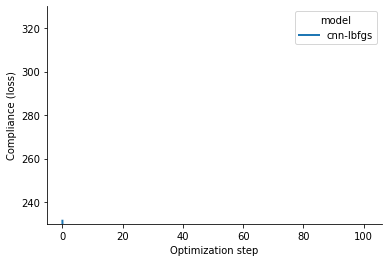

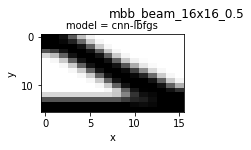

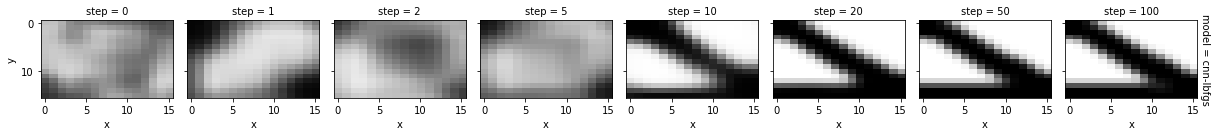

In [1]:
from IPython import display
from PIL import Image
import time
import seaborn
import matplotlib.pyplot as plt
import xarray
import pandas as pd

from neural_structural_optimization.Opt_2DModel_20201206 import pipeline_utils
from neural_structural_optimization.Opt_2DModel_20201206 import problems
from neural_structural_optimization.Opt_2DModel_20201206 import models
from neural_structural_optimization.Opt_2DModel_20201206 import topo_api
from neural_structural_optimization.Opt_2DModel_20201206 import train


def train_all(problem, max_iterations, cnn_kwargs=None):
    args = topo_api.specified_task(problem)
    if cnn_kwargs is None:
        cnn_kwargs = {}

 #   model = models.PixelModel(args=args)
 #   ds_mma = train.method_of_moving_asymptotes(model, max_iterations)

 #   model = models.PixelModel(args=args)
 #   ds_oc = train.optimality_criteria(model, max_iterations)

 #   model = models.PixelModel(args=args)
 #   ds_pix = train.train_lbfgs(model, max_iterations)

    model = models.CNNModel(args=args, **cnn_kwargs)
    ds_cnn = train.train_lbfgs(model, max_iterations)

    dims = pd.Index(['cnn-lbfgs'], name='model')
    return xarray.concat([ds_cnn], dim=dims)

#"MBB beam with a larger grid"
problem = problems.PROBLEMS_BY_NAME['mbb_beam_16x16_0.5']
max_iterations = 100

start = time.time()
ds = train_all(problem, max_iterations)
e_time = time.time() - start
print ("e_time:{0}".format(e_time) + "[s]")
#%time ds = train_all(problem, max_iterations)

ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(230, 330)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

ds.design.ffill('step').sel(step=100).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

ds.design.sel(step=[0, 1, 2, 5, 10, 20, 50, 100]).plot.imshow(
    row='model', col='step', x='x', y='y', size=2, aspect=1,
    yincrease=False, add_colorbar=False, cmap='Greys')


